# Step-1 : KNN Regressor & Linear Regression:

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [7]:
le=LabelEncoder()

In [8]:
df['Gender']=le.fit_transform(df[['Gender']])

In [9]:
x=df.drop('Weight', axis=1)

In [10]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [11]:
y=df['Weight']

In [12]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=142)

In [14]:
xtrain.shape

(5988, 2)

In [15]:
xtest.shape

(2567, 2)

# Linear Regression

In [16]:
lrg=LinearRegression()

In [17]:
lrg.fit(xtrain,ytrain)

LinearRegression()

In [18]:
xtest.head()

,Gender,Height
5257,0,61.124727
2226,1,65.562804
3973,1,69.696567
8445,0,65.125407
6296,0,59.499077


In [19]:
ytest.head()

5257    117.388949
2226    162.521916
3973    181.206640
8445    140.376336
6296    128.915659
Name: Weight, dtype: float64

In [20]:
lrg.predict([[0, 61.124727]])

array([120.47566549])

In [21]:
pred=lrg.predict(xtest)

In [22]:
print(pred)

[120.47566305 166.37257846 190.99920033 ... 186.80502797 167.42155508
 122.8979371 ]


In [23]:
np.array(ytest)

array([117.388949 , 162.5219156, 181.2066396, ..., 193.7549909,
       166.6227324, 140.9801576])

In [24]:
mean_squared_error(ytest,pred)

100.46606328177812

In [25]:
mean_absolute_error(ytest,pred)

7.930329203847612

In [26]:
lrg.coef_

array([19.45735701,  5.95743496])

In [27]:
lrg.intercept_

-243.67091979911214

In [28]:
lrg.score(xtest,ytest)

0.901201889278392

In [29]:
lrg.score(xtrain,ytrain)

0.8993784595108808

# KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
knneig=KNeighborsRegressor(n_neighbors=200)

In [95]:
knneig.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=200)

In [96]:
knneig.predict([[0,61.124727]])

array([120.62636336])

In [97]:
pred_knn=knneig.predict(xtest)
pred_knn

array([120.62636336, 166.30495884, 191.60608876, ..., 186.40762965,
       167.92245697, 122.74362311])

In [98]:
pred_knn.shape

(2567,)

In [99]:
ytest.shape

(2567,)

In [100]:
print(pred_knn)

[120.62636336 166.30495884 191.60608876 ... 186.40762965 167.92245697
 122.74362311]


In [103]:
type(ytest)

pandas.core.series.Series

In [104]:
type(pred_knn)

numpy.ndarray

In [105]:
con_y=ytest.to_numpy()#converted ytest to numpy array

In [106]:
type(con_y)

numpy.ndarray

In [107]:
df_compare=pd.DataFrame(data=pred_knn, columns=['Predicted Values'])#Created a Data Frame with the predicted value
df_compare.insert(0,'Actual Values',con_y)# Inserted ytest values to the Data Frame

In [108]:
df_compare

,Actual Values,Predicted Values
0,117.388949,120.626363
1,162.521916,166.304959
2,181.206640,191.606089
3,140.376336,143.368762
4,128.915659,111.971717
...,...,...
2562,146.045528,137.546546
2563,147.812869,138.649959
2564,193.754991,186.407630
2565,166.622732,167.922457


In [44]:
df_compare.head()

,Actual Values,Predicted Values
0,117.388949,122.918764
1,162.521916,168.492148
2,181.206640,191.235581
3,140.376336,141.346640
4,128.915659,114.014343


In [45]:
ytest.head()

5257    117.388949
2226    162.521916
3973    181.206640
8445    140.376336
6296    128.915659
Name: Weight, dtype: float64

In [46]:
mean_squared_error(pred_knn, ytest)

106.7367921383092

In [47]:
mean_absolute_error(pred_knn,ytest)

8.152041210585702

In [109]:
knneig.score(xtest,ytest)

0.8961873570884787

In [110]:
knneig.score(xtrain,ytrain)

0.8929729656023101

# Step-2: KNN Classifier:

In [48]:
df2=pd.read_csv('weight-height.csv')

In [49]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [50]:
x=df2.drop('Gender',axis=1)

In [51]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [52]:
y=df2['Gender']

In [53]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [54]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x,y, test_size=.3, random_state=142)

In [55]:
xtrain2.head()

,Height,Weight
4771,68.486412,172.546072
8405,63.946483,135.037495
4003,68.919604,194.278451
2418,64.497726,169.841016
5968,67.049244,160.738096


In [56]:
ytrain2.head()

4771      Male
8405    Female
4003      Male
2418      Male
5968    Female
Name: Gender, dtype: object

In [57]:
xtrain2.shape

(5988, 2)

In [58]:
xtest2.shape

(2567, 2)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knclas=KNeighborsClassifier(n_neighbors=200)

In [61]:
knclas.fit(xtrain2,ytrain2)

KNeighborsClassifier(n_neighbors=200)

In [62]:
knclas.predict([[68.486412,172.546072]])

array(['Male'], dtype=object)

In [63]:
knclas.predict([[63.946483,135]])

array(['Female'], dtype=object)

In [64]:
knn_pred=knclas.predict(xtest2)

In [65]:
knn_pred

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Female'],
      dtype=object)

In [66]:
type(knn_pred)

numpy.ndarray

In [67]:
type(ytest2)

pandas.core.series.Series

In [68]:
knn_actual=ytest2.to_numpy()

In [69]:
type(knn_actual)

numpy.ndarray

In [70]:
df_table=pd.DataFrame(data=knn_actual,columns=['Actual Values'])

In [71]:
df_table.head()

,Actual Values
0,Female
1,Male
2,Male
3,Female
4,Female


In [72]:
df_table.insert(1,'Predicted Values', knn_pred)

In [73]:
df_table.head()

,Actual Values,Predicted Values
0,Female,Female
1,Male,Male
2,Male,Male
3,Female,Female
4,Female,Female


In [75]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve

In [77]:
print(classification_report(ytest2, knn_pred))

              precision    recall  f1-score   support

      Female       0.90      0.88      0.89      1033
        Male       0.92      0.94      0.93      1534

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [79]:
cm=confusion_matrix(ytest2,knn_pred)

In [80]:
cm

array([[ 909,  124],
       [  99, 1435]], dtype=int64)

In [81]:
knclas.score(xtest2, ytest2)

0.9131281651733542

In [83]:
from sklearn import metrics

In [84]:
metrics.accuracy_score(ytest2,knn_pred)

0.9131281651733542

<AxesSubplot:>

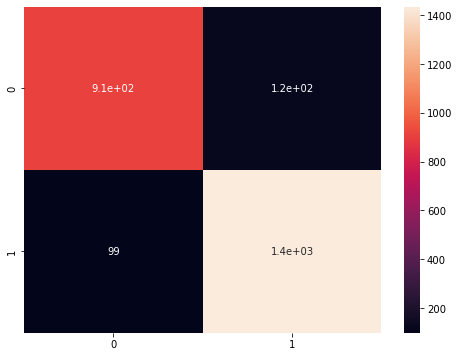

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)

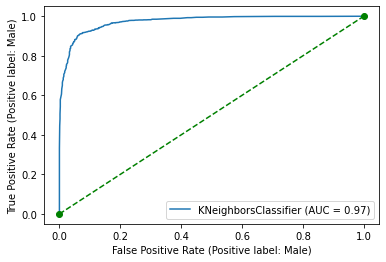

In [92]:
plot_roc_curve(knclas, xtest2, ytest2)
plt.plot([0,1],[0,1], 'go--')